# PLANETS OF OUR SOLAR SYSTEM

# Introduction
**This dataset contains detailed information about the eight planets in our solar system. It includes various parameters like the planet's name, mass, diameter, density, gravity, escape velocity, and orbital properties. The dataset also covers aspects like the number of moons, presence of a ring system, and whether the planet has a global magnetic field.**

**Key Features:**

*Classification:** The planets are classified into inner terrestrial (rocky) planets ‚Äì Mercury, Venus, Earth, and Mars ‚Äì and outer gas giants ‚Äì Jupiter, Saturn, Uranus, and Neptune.


**Physical Properties:** Data on each planet's mass, diameter, and density, along with surface gravity and escape velocity.


**Orbital Characteristics:** Information about the planets' distances from the Sun, orbital periods, velocities, inclinations, and eccentricities.


**Atmospheric and Surface Details:** Mean temperature, surface pressure, length of day, and rotation periods are provided for better understanding of the planetary environments.


**Additional Attributes:** Includes data on the number of moons, ring systems, and magnetic fields.

# import session

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

# DATA EXPLORATION

In [2]:
df = pd.read_csv("/kaggle/input/planet-dataset/planets.csv")

In [3]:
df.head()

Planet                                            Color  Mass (10^24kg)  \
0  Mercury                                             Grey           0.330   
1    Venus                                   Brown and Grey           4.870   
2    Earth                      Blue, Brown Green and White           5.970   
3     Mars                               Red, Brown and Tan           0.642   
4  Jupiter  Brown, Orange and Tan, with White cloud stripes        1898.000   

   Diameter (km)  Density (kg/m^3)  Surface Gravity(m/s^2)  \
0           4879              5429                     3.7   
1          12104              5243                     8.9   
2          12756              5514                     9.8   
3           6792              3934                     3.7   
4         142984              1326                    23.1   

   Escape Velocity (km/s)  Rotation Period (hours)  Length of Day (hours)  \
0                     4.3                   1407.6                 4222.6   
1                    10.4                  -5832.5                 2802.0   
2                    11.2                     23.9                   24.0   
3                     5.0                     24.6                   24.7   
4                    59.5                      9.9                    9.9   

   Distance from Sun (10^6 km)  ...  Orbital Period (days)  \
0                         57.9  ...                     88   
1                        108.2  ...                  224.7   
2                        149.6  ...                  365.2   
3                        228.0  ...                    687   
4                        778.5  ...                   4331   

   Orbital Velocity (km/s) Orbital Inclination (degrees)  \
0                     47.4                           7.0   
1                     35.0                           3.4   
2                     29.8                           0.0   
3                     24.1                           1.8   
4                     13.1                           1.3   

   Orbital Eccentricity  Obliquity to Orbit (degrees)  Mean Temperature (C)  \
0                 0.206                         0.034                   167   
1                 0.007                       177.400                   464   
2                 0.017                        23.400                    15   
3                 0.094                        25.200                   -65   
4                 0.049                         3.100                  -110   

   Surface Pressure (bars)  Number of Moons Ring System?  \
0                        0                0           No   
1                       92                0           No   
2                        1                1           No   
3                     0.01                2           No   
4                  Unknown               79          Yes   

   Global Magnetic Field?  
0                     Yes  
1                      No  
2                     Yes  
3                      No  
4                     Yes  

[5 rows x 22 columns]

In [4]:
df.shape

(8, 22)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 22 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Planet                         8 non-null      object 
 1   Color                          8 non-null      object 
 2   Mass (10^24kg)                 8 non-null      float64
 3   Diameter (km)                  8 non-null      int64  
 4   Density (kg/m^3)               8 non-null      int64  
 5   Surface Gravity(m/s^2)         8 non-null      float64
 6   Escape Velocity (km/s)         8 non-null      float64
 7   Rotation Period (hours)        8 non-null      float64
 8   Length of Day (hours)          8 non-null      float64
 9   Distance from Sun (10^6 km)    8 non-null      float64
 10  Perihelion (10^6 km)           8 non-null      float64
 11  Aphelion (10^6 km)             8 non-null      float64
 12  Orbital Period (days)          8 non-null      object 

In [6]:
df.isnull().sum()

Planet                           0
Color                            0
Mass (10^24kg)                   0
Diameter (km)                    0
Density (kg/m^3)                 0
Surface Gravity(m/s^2)           0
Escape Velocity (km/s)           0
Rotation Period (hours)          0
Length of Day (hours)            0
Distance from Sun (10^6 km)      0
Perihelion (10^6 km)             0
Aphelion (10^6 km)               0
Orbital Period (days)            0
Orbital Velocity (km/s)          0
Orbital Inclination (degrees)    0
Orbital Eccentricity             0
Obliquity to Orbit (degrees)     0
Mean Temperature (C)             0
Surface Pressure (bars)          0
Number of Moons                  0
Ring System?                     0
Global Magnetic Field?           0
dtype: int64

In [7]:
df["Orbital Period (days)"] = df["Orbital Period (days)"].str.replace(',','')
df["Orbital Period (days)"] = df["Orbital Period (days)"].astype('float')

In [8]:
df.head()

Planet                                            Color  Mass (10^24kg)  \
0  Mercury                                             Grey           0.330   
1    Venus                                   Brown and Grey           4.870   
2    Earth                      Blue, Brown Green and White           5.970   
3     Mars                               Red, Brown and Tan           0.642   
4  Jupiter  Brown, Orange and Tan, with White cloud stripes        1898.000   

   Diameter (km)  Density (kg/m^3)  Surface Gravity(m/s^2)  \
0           4879              5429                     3.7   
1          12104              5243                     8.9   
2          12756              5514                     9.8   
3           6792              3934                     3.7   
4         142984              1326                    23.1   

   Escape Velocity (km/s)  Rotation Period (hours)  Length of Day (hours)  \
0                     4.3                   1407.6                 4222.6   
1                    10.4                  -5832.5                 2802.0   
2                    11.2                     23.9                   24.0   
3                     5.0                     24.6                   24.7   
4                    59.5                      9.9                    9.9   

   Distance from Sun (10^6 km)  ...  Orbital Period (days)  \
0                         57.9  ...                   88.0   
1                        108.2  ...                  224.7   
2                        149.6  ...                  365.2   
3                        228.0  ...                  687.0   
4                        778.5  ...                 4331.0   

   Orbital Velocity (km/s)  Orbital Inclination (degrees)  \
0                     47.4                            7.0   
1                     35.0                            3.4   
2                     29.8                            0.0   
3                     24.1                            1.8   
4                     13.1                            1.3   

   Orbital Eccentricity  Obliquity to Orbit (degrees)  Mean Temperature (C)  \
0                 0.206                         0.034                   167   
1                 0.007                       177.400                   464   
2                 0.017                        23.400                    15   
3                 0.094                        25.200                   -65   
4                 0.049                         3.100                  -110   

   Surface Pressure (bars)  Number of Moons Ring System?  \
0                        0                0           No   
1                       92                0           No   
2                        1                1           No   
3                     0.01                2           No   
4                  Unknown               79          Yes   

   Global Magnetic Field?  
0                     Yes  
1                      No  
2                     Yes  
3                      No  
4                     Yes  

[5 rows x 22 columns]

In [9]:
df.tail()

Planet                                            Color  Mass (10^24kg)  \
3     Mars                               Red, Brown and Tan           0.642   
4  Jupiter  Brown, Orange and Tan, with White cloud stripes        1898.000   
5   Saturn                     Golden, Brown, and Blue-Grey         568.000   
6   Uranus                                       Blue-Green          86.800   
7  Neptune                                             Blue         102.000   

   Diameter (km)  Density (kg/m^3)  Surface Gravity(m/s^2)  \
3           6792              3934                     3.7   
4         142984              1326                    23.1   
5         120536               687                     9.0   
6          51118              1270                     8.7   
7          49528              1638                    11.0   

   Escape Velocity (km/s)  Rotation Period (hours)  Length of Day (hours)  \
3                     5.0                     24.6                   24.7   
4                    59.5                      9.9                    9.9   
5                    35.5                     10.7                   10.7   
6                    21.3                    -17.2                   17.2   
7                    23.5                     16.1                   16.1   

   Distance from Sun (10^6 km)  ...  Orbital Period (days)  \
3                        228.0  ...                  687.0   
4                        778.5  ...                 4331.0   
5                       1432.0  ...                10747.0   
6                       2867.0  ...                30589.0   
7                       4515.0  ...                59800.0   

   Orbital Velocity (km/s)  Orbital Inclination (degrees)  \
3                     24.1                            1.8   
4                     13.1                            1.3   
5                      9.7                            2.5   
6                      6.8                            0.8   
7                      5.4                            1.8   

   Orbital Eccentricity  Obliquity to Orbit (degrees)  Mean Temperature (C)  \
3                 0.094                          25.2                   -65   
4                 0.049                           3.1                  -110   
5                 0.052                          26.7                  -140   
6                 0.047                          97.8                  -195   
7                 0.010                          28.3                  -200   

   Surface Pressure (bars)  Number of Moons Ring System?  \
3                     0.01                2           No   
4                  Unknown               79          Yes   
5                  Unknown               82          Yes   
6                  Unknown               27          Yes   
7                  Unknown               14          Yes   

   Global Magnetic Field?  
3                      No  
4                     Yes  
5                     Yes  
6                     Yes  
7                     Yes  

[5 rows x 22 columns]

# **1. How Many Planets in Our Solar System?**

In [10]:
df.Planet

0    Mercury
1      Venus
2      Earth
3       Mars
4    Jupiter
5     Saturn
6     Uranus
7    Neptune
Name: Planet, dtype: object

# DATA VISUALIZATION

# 2. which is the largest planet by size?

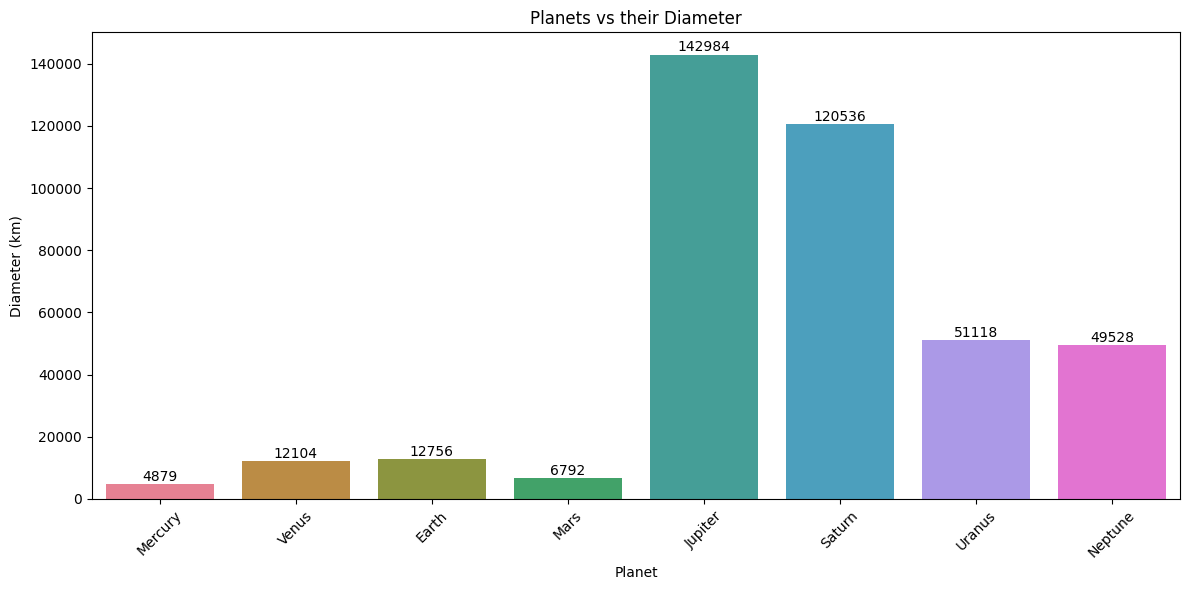

In [11]:
plt.figure(figsize=(12, 6))

# Creating the bar plot
sns.barplot(x='Planet', y='Diameter (km)', data=df, palette='husl')

# Adding labels for each bar
for index, value in enumerate(df['Diameter (km)']):
    plt.text(index, value + 1000, f'{value:.0f}', ha='center')  # Adjusts the position of the labels

# Setting labels and title
plt.ylabel('Diameter (km)')
plt.xlabel('Planet')
plt.title('Planets vs their Diameter')

# Rotate x-tick labels for better readability
plt.xticks(rotation=45)

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()


**Observation:**

"Jupiter is the largest planet because, during the solar system's formation, it had the most material to attract and grow. In contrast, Mercury is the smallest, as it had less matter to accumulate." 

This version provides the key information in a concise manner while still being informative.

 # 3. Which planet has the largest mass?

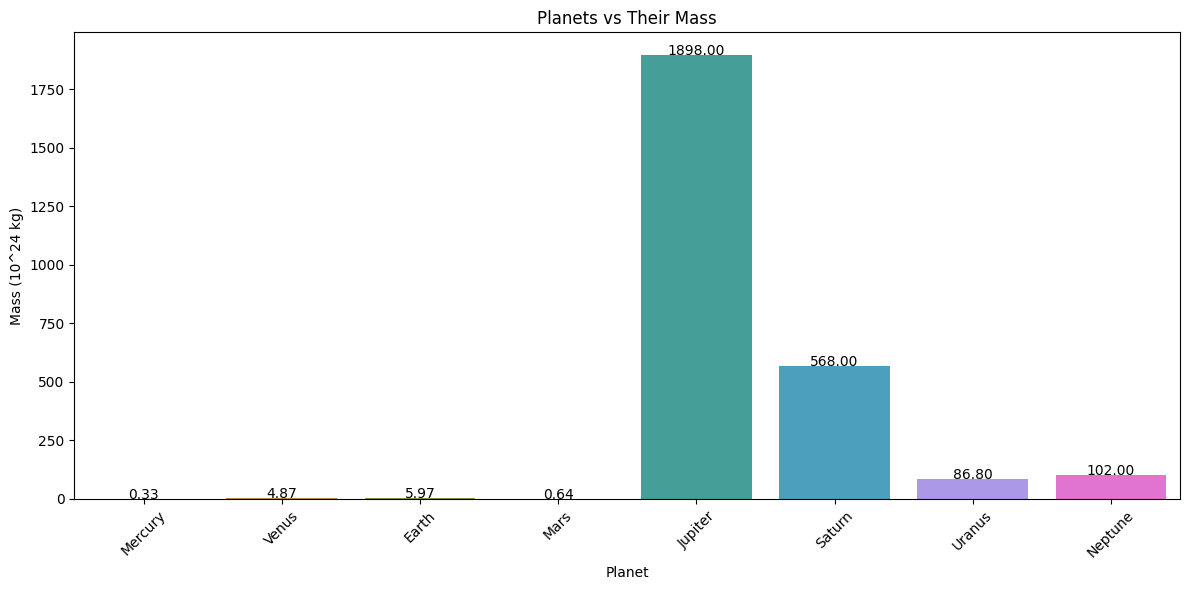

In [12]:
plt.figure(figsize=(12, 6))

# Creating the bar plot
sns.barplot(x='Planet', y='Mass (10^24kg)', data=df, palette='husl')

# Adding labels for each bar
for index, value in enumerate(df['Mass (10^24kg)']):
    plt.text(index, value + 0.1, f'{value:.2f}', ha='center')  # Adjusts the position and format of the labels

# Setting labels and title
plt.ylabel('Mass (10^24 kg)')
plt.xlabel('Planet')
plt.title('Planets vs Their Mass')

# Rotate x-tick labels for better readability
plt.xticks(rotation=45)

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()


**Observation:**

"Neptune is the farthest planet from the Sun, while Mercury is the closest." 

This revision provides a clearer and more direct comparison between Neptune and Mercury regarding their distance from the Sun.

# 4. Which planet is farthest from the Sun, and which is nearest?

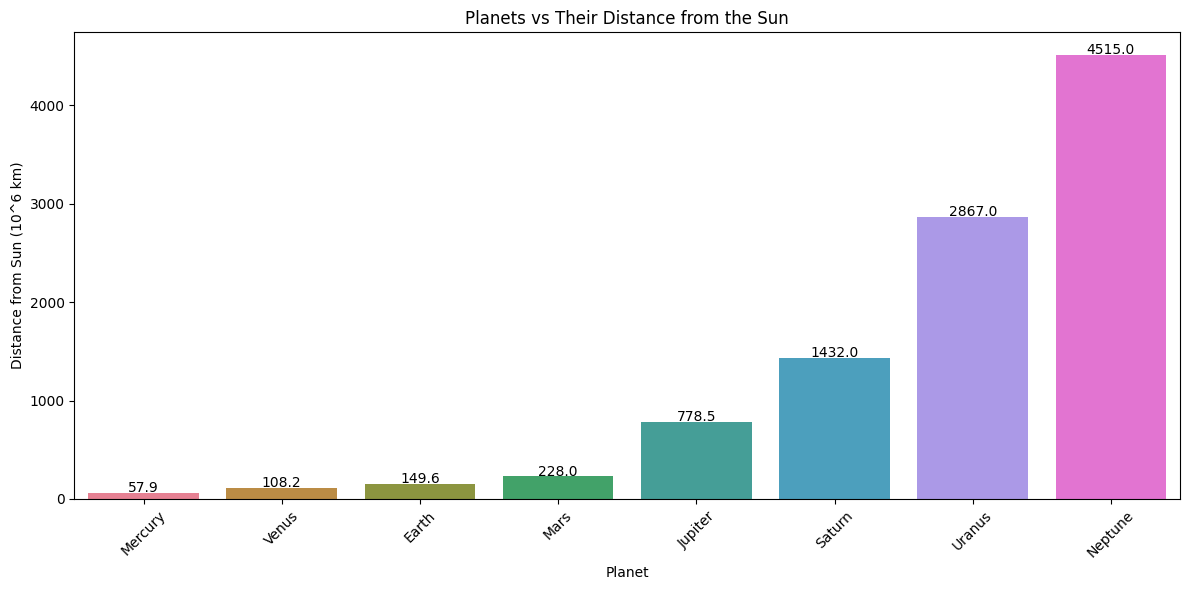

In [13]:
plt.figure(figsize=(12, 6))

# Creating the bar plot
sns.barplot(x='Planet', y='Distance from Sun (10^6 km)', data=df, palette='husl')

# Adding labels for each bar
for index, value in enumerate(df['Distance from Sun (10^6 km)']):
    plt.text(index, value + 10, f'{value:.1f}', ha='center')  # Adjusts the position and format of the labels

# Setting labels and title
plt.ylabel('Distance from Sun (10^6 km)')
plt.xlabel('Planet')
plt.title('Planets vs Their Distance from the Sun')

# Rotate x-tick labels for better readability
plt.xticks(rotation=45)

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()


**Observation:**

"Neptune is the farthest planet from the Sun, while Mercury is the closest."

# 5. On which planet is the length of the day the longest?

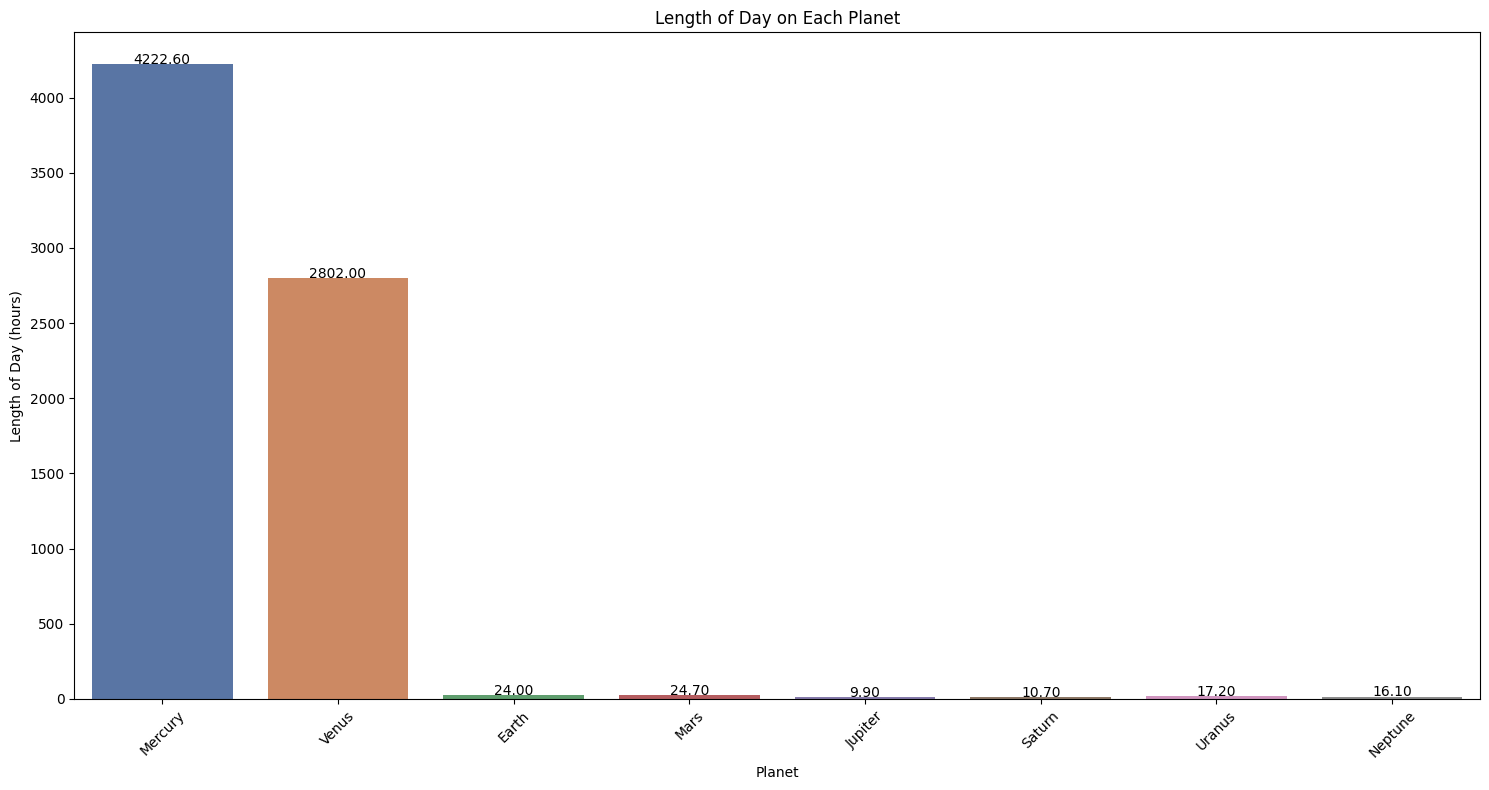

In [14]:
plt.figure(figsize=(15, 8))

# Creating the bar plot
sns.barplot(x='Planet', y='Length of Day (hours)', data=df, palette='deep')

# Adding labels for each bar
for index, value in enumerate(df['Length of Day (hours)']):
    plt.text(index, value + 1, f'{value:.2f}', ha='center')  # Adjust position and format of labels

# Setting labels and title
plt.ylabel('Length of Day (hours)')
plt.xlabel('Planet')
plt.title('Length of Day on Each Planet')

# Rotate x-tick labels for better readability
plt.xticks(rotation=45)

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()


Anomaly Observed:

"The length of a day on Venus is greater than that on Mercury, indicating a potential anomaly in the dataset. This inconsistency should be corrected to ensure the accuracy of the data."

#  **Correcting Anomaly in the Dataset**

In [15]:
# Replace incorrect values with correct values (assuming 4222.6 for Venus and 2802.0 for Mercury)
if 4222.6 in df['Length of Day (hours)'].values and 2802.0 in df['Length of Day (hours)'].values:
    df['Length of Day (hours)'].replace({4222.6: 1407.6, 2802.0: 5832.5}, inplace=True)
else:
    print("Values to be replaced are not found in the dataset.")

# Save the updated dataset to a new file
df.to_csv('planets_updated.csv', index=False)


In [16]:
df.head()

Planet                                            Color  Mass (10^24kg)  \
0  Mercury                                             Grey           0.330   
1    Venus                                   Brown and Grey           4.870   
2    Earth                      Blue, Brown Green and White           5.970   
3     Mars                               Red, Brown and Tan           0.642   
4  Jupiter  Brown, Orange and Tan, with White cloud stripes        1898.000   

   Diameter (km)  Density (kg/m^3)  Surface Gravity(m/s^2)  \
0           4879              5429                     3.7   
1          12104              5243                     8.9   
2          12756              5514                     9.8   
3           6792              3934                     3.7   
4         142984              1326                    23.1   

   Escape Velocity (km/s)  Rotation Period (hours)  Length of Day (hours)  \
0                     4.3                   1407.6                 1407.6   
1                    10.4                  -5832.5                 5832.5   
2                    11.2                     23.9                   24.0   
3                     5.0                     24.6                   24.7   
4                    59.5                      9.9                    9.9   

   Distance from Sun (10^6 km)  ...  Orbital Period (days)  \
0                         57.9  ...                   88.0   
1                        108.2  ...                  224.7   
2                        149.6  ...                  365.2   
3                        228.0  ...                  687.0   
4                        778.5  ...                 4331.0   

   Orbital Velocity (km/s)  Orbital Inclination (degrees)  \
0                     47.4                            7.0   
1                     35.0                            3.4   
2                     29.8                            0.0   
3                     24.1                            1.8   
4                     13.1                            1.3   

   Orbital Eccentricity  Obliquity to Orbit (degrees)  Mean Temperature (C)  \
0                 0.206                         0.034                   167   
1                 0.007                       177.400                   464   
2                 0.017                        23.400                    15   
3                 0.094                        25.200                   -65   
4                 0.049                         3.100                  -110   

   Surface Pressure (bars)  Number of Moons Ring System?  \
0                        0                0           No   
1                       92                0           No   
2                        1                1           No   
3                     0.01                2           No   
4                  Unknown               79          Yes   

   Global Magnetic Field?  
0                     Yes  
1                      No  
2                     Yes  
3                      No  
4                     Yes  

[5 rows x 22 columns]

# Graph after Correction of Anomaly

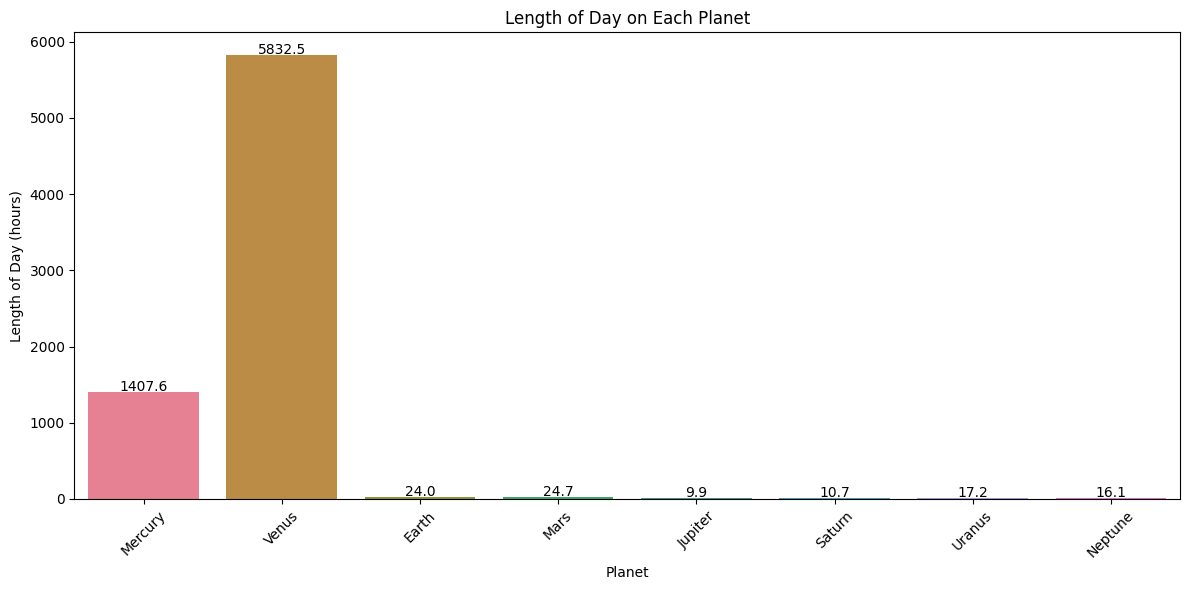

In [17]:
plt.figure(figsize=(12, 6))

# Creating the bar plot
sns.barplot(x='Planet', y='Length of Day (hours)', data=df, palette='husl')

# Adding labels for each bar
for index, value in enumerate(df['Length of Day (hours)']):
    plt.text(index, value + 10, f'{value:.1f}', ha='center')  # Adjusts the position and format of the labels

# Setting labels and title
plt.ylabel('Length of Day (hours)')
plt.xlabel('Planet')
plt.title('Length of Day on Each Planet')  # Corrected the typo in the title

# Rotate x-tick labels for better readability
plt.xticks(rotation=45)

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()


***Observation:***

"Venus has the longest day of any planet in the solar system, taking 243 Earth days to complete one rotation. Interestingly, a day on Venus is longer than its year, which lasts about 224 Earth days. Scientists believe that the Sun's strong gravitational pull is a key factor in Venus's slow rotation."

# 6. Which planet in the solar system has a clockwise rotation, and why?

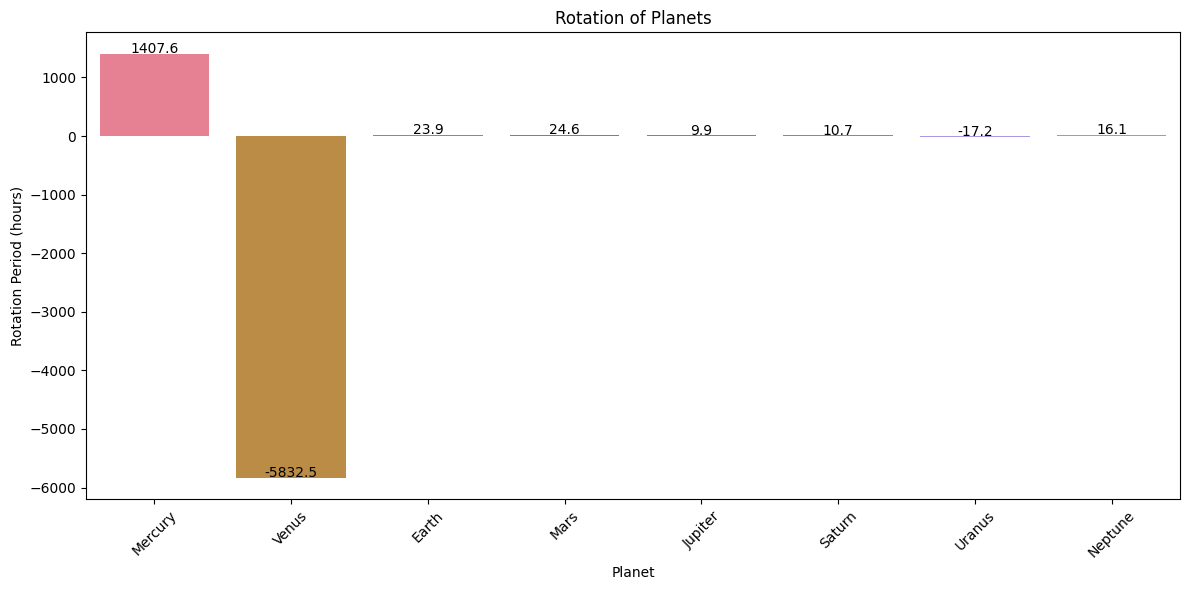

In [18]:
plt.figure(figsize=(12, 6))

# Creating the bar plot
sns.barplot(x='Planet', y='Rotation Period (hours)', data=df, palette='husl')

# Adding labels for each bar
for index, value in enumerate(df['Rotation Period (hours)']):
    plt.text(index, value + 10, f'{value:.1f}', ha='center')  # Adjusts the position of the labels

# Setting labels and title
plt.title('Rotation of Planets')  # Corrected the typo in the title
plt.xlabel('Planet')
plt.ylabel('Rotation Period (hours)')

# Rotate x-tick labels for better readability
plt.xticks(rotation=45)

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()


**Observation:**

"Most planets rotate on their axes in an anticlockwise direction, but Venus rotates clockwise, known as retrograde rotation. This means Venus rotates 'backwards' relative to its orbital direction.

* Aside from Venus, Uranus is the only other planet in our solar system that rotates this way. The reason for Venus's unusual rotation isn't definitively known, but there are a few theories:

* Planetary Collision: Venus may have been struck by a large object early in its history, changing its rotation direction and slowing it down.

* Tidal Effects: Friction between Venus's core and mantle, along with the Sun's tidal pull on its thick atmosphere, might have gradually reversed its rotation."

# 7. Which planet has the greatest density?

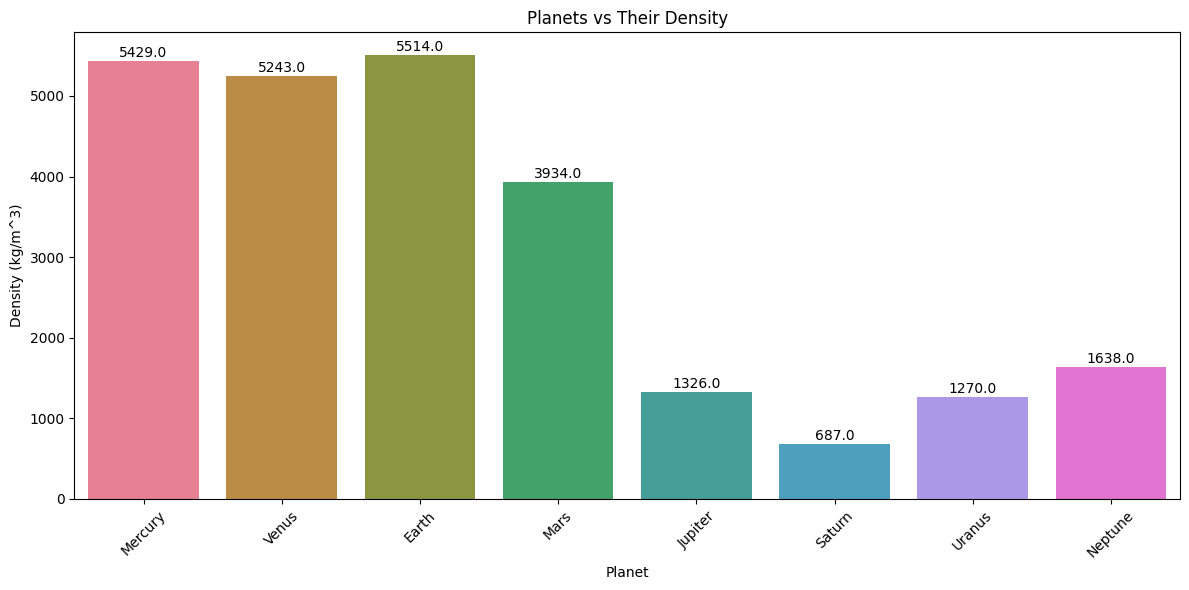

In [19]:
plt.figure(figsize=(12, 6))

# Creating the bar plot
sns.barplot(x='Planet', y='Density (kg/m^3)', data=df, palette='husl')

# Adding labels for each bar
for index, value in enumerate(df['Density (kg/m^3)']):
    plt.text(index, value + 50, f'{value:.1f}', ha='center')  # Adjust position and format of labels

# Setting labels and title
plt.ylabel('Density (kg/m^3)')
plt.xlabel('Planet')
plt.title('Planets vs Their Density')

# Rotate x-tick labels for better readability
plt.xticks(rotation=45)

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()


**Observation:**

* "Earth is the densest planet in our solar system, with an average density of 5,514 kg/m¬≥, followed by Mercury at 5,429 kg/m¬≥.
 
* In general, terrestrial (rocky) planets are denser than gas and ice giants. This is because the inner planets are composed mainly of dense, solid rock, while the outer planets are made mostly of gas.
 
* Saturn is the least dense planet in the solar system, with a density even lower than that of water."

# 8. Which planet has the longest year?

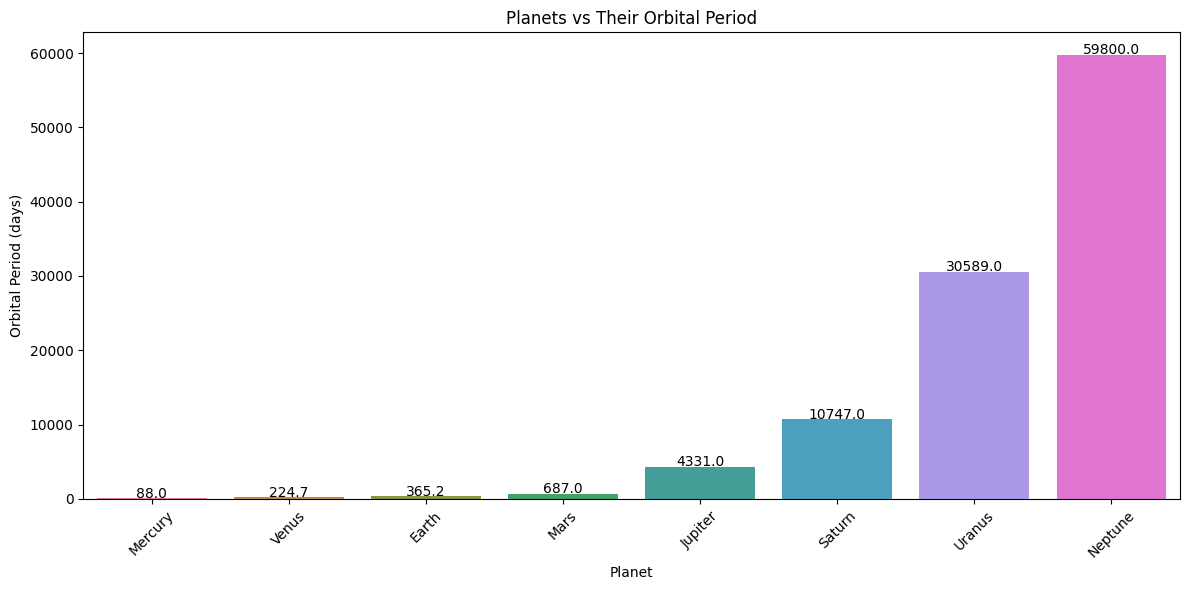

In [20]:
plt.figure(figsize=(12, 6))

# Creating the bar plot
sns.barplot(x='Planet', y='Orbital Period (days)', data=df, palette='husl')

# Adding labels for each bar
for index, value in enumerate(df['Orbital Period (days)']):
    plt.text(index, value + 50, f'{value:.1f}', ha='center')  # Adjust the position and format of labels

# Setting labels and title
plt.ylabel('Orbital Period (days)')
plt.xlabel('Planet')
plt.title('Planets vs Their Orbital Period')

# Rotate x-tick labels for better readability
plt.xticks(rotation=45)

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()


**Observation:**


Mercury:
* Being the closest planet to the Sun, Mercury has the shortest orbital period of 88 days. The Sun's strong gravitational pull makes Mercury move faster along its shorter path.

Neptune:
* Neptune has the longest orbital period in the solar system, taking 164.8 Earth years (or 60,182 Earth days) to complete one orbit. Planets farther from the Sun have longer paths and move more slowly due to the weaker gravitational pull from the Sun.

# 9. Which planet has the largest escape velocity, and why?

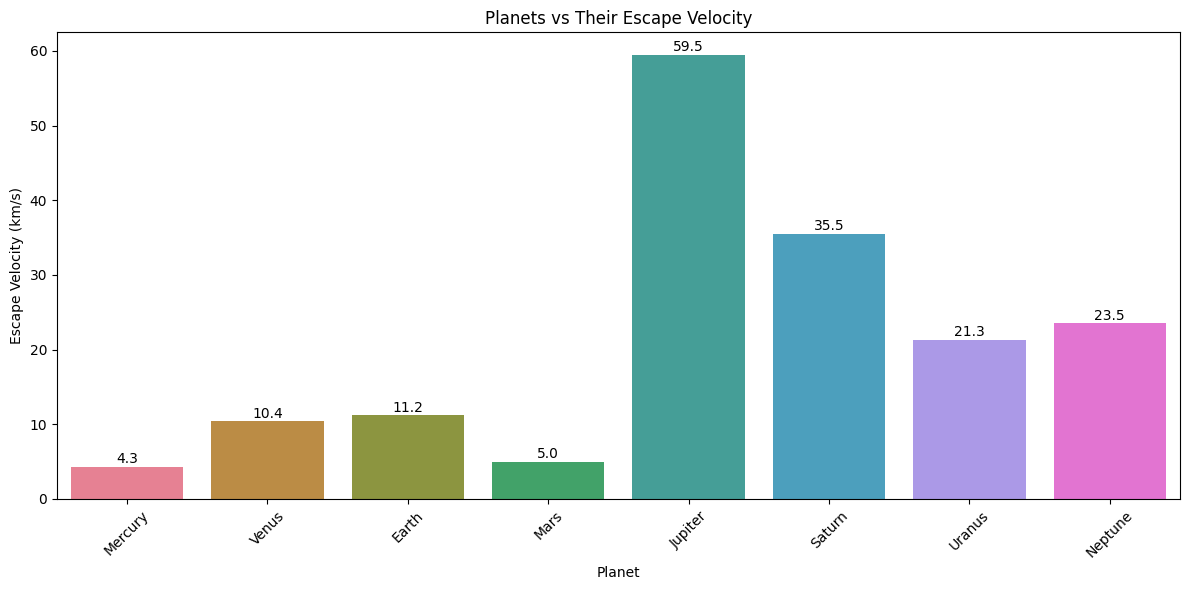

In [21]:
plt.figure(figsize=(12, 6))

# Creating the bar plot
sns.barplot(x='Planet', y='Escape Velocity (km/s)', data=df, palette='husl')

# Adding labels for each bar
for index, value in enumerate(df['Escape Velocity (km/s)']):
    plt.text(index, value + 0.5, f'{value:.1f}', ha='center')  # Adjust the position and format of labels

# Setting labels and title
plt.ylabel('Escape Velocity (km/s)')
plt.xlabel('Planet')
plt.title('Planets vs Their Escape Velocity')

# Rotate x-tick labels for better readability
plt.xticks(rotation=45)

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()


**Observation:**

* "Escape velocity is the minimum speed an object must reach to break free from a planet's gravitational field. It depends on the mass and radius of the celestial body since gravitational force is influenced by the object's mass.

* Jupiter has the highest escape velocity among the planets, at 59.5 km/s, due to its massive size and gravitational pull."

# 10. Which planet has the highest surface gravity and why?

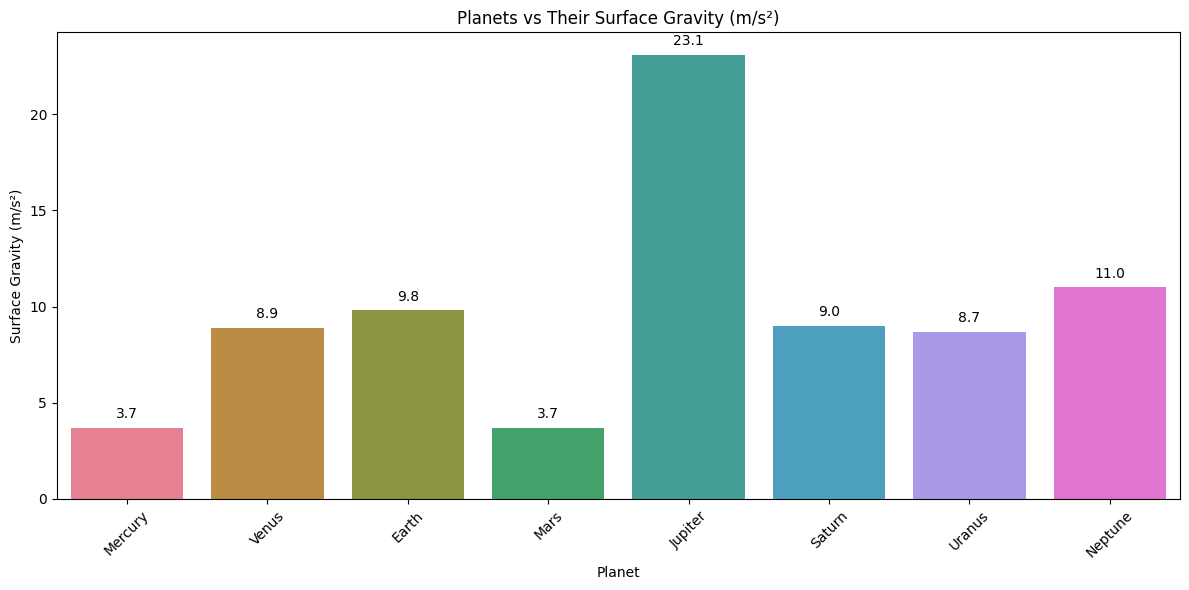

In [22]:
plt.figure(figsize=(12, 6))

# Creating the bar plot
sns.barplot(x='Planet', y='Surface Gravity(m/s^2)', data=df, palette='husl')

# Adding labels for each bar
for index, value in enumerate(df['Surface Gravity(m/s^2)']):
    plt.text(index, value + 0.5, f'{value:.1f}', ha='center')  # Adjust the position and format of the labels

# Setting labels and title
plt.ylabel('Surface Gravity (m/s¬≤)')
plt.xlabel('Planet')
plt.title('Planets vs Their Surface Gravity (m/s¬≤)')

# Rotate x-tick labels for better readability
plt.xticks(rotation=45)

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()


**Observation:**

* "Surface gravity is the gravitational force experienced at the surface of a celestial body, measured in meters per second squared (m/s¬≤). It depends on the planet's mass and radius, with gravitational force decreasing as the distance from the center of mass increases.

* Jupiter's surface gravity is about 2.4 times greater than Earth's due to its immense mass. However, because Jupiter's radius is much larger, the gravitational pull at its surface is somewhat weaker than it would be if it were smaller in size. This relationship also explains why Jupiter has the highest escape velocity among the planets."

# 11. Why is Venus the hottest planet in the solar system?

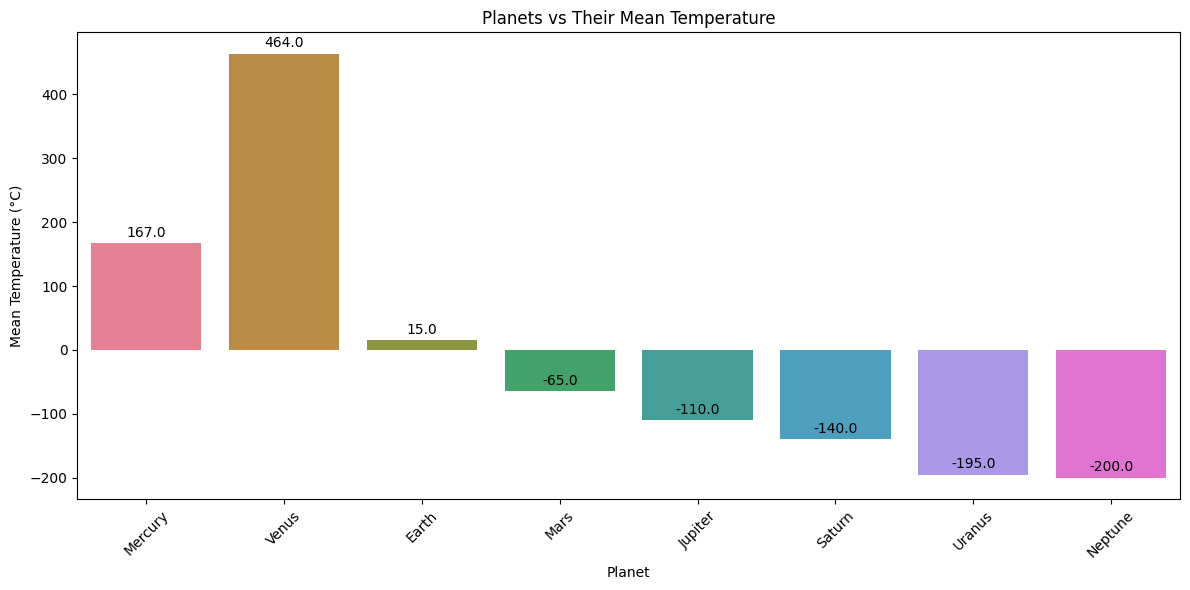

In [23]:
plt.figure(figsize=(12, 6))

# Creating the bar plot
sns.barplot(x='Planet', y='Mean Temperature (C)', data=df, palette='husl')

# Adding labels for each bar
for index, value in enumerate(df['Mean Temperature (C)']):
    plt.text(index, value + 10, f'{value:.1f}', ha='center')  # Adjust the position and format of the labels

# Setting labels and title
plt.ylabel('Mean Temperature (¬∞C)')
plt.xlabel('Planet')
plt.title('Planets vs Their Mean Temperature')

# Rotate x-tick labels for better readability
plt.xticks(rotation=45)

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()


**Observation:**

* "Venus is the hottest planet in our solar system, with surface temperatures reaching around 465¬∞C (864¬∞F). This extreme heat is due to its thick atmosphere, which traps heat in a runaway greenhouse effect.

* Though Venus is similar in size and structure to Earth, its atmosphere is rich in greenhouse gases like carbon dioxide and covered by clouds of sulfuric acid. Sunlight passes through this dense atmosphere, heats the surface, and the trapped heat cannot escape, leading to the intense temperatures.

* While Mercury is closer to the Sun, it lacks an atmosphere to trap heat, making Venus hotter. Generally, planetary surface temperatures decrease with increasing distance from the Sun."

# 12. Which planet has the highest number of moons?

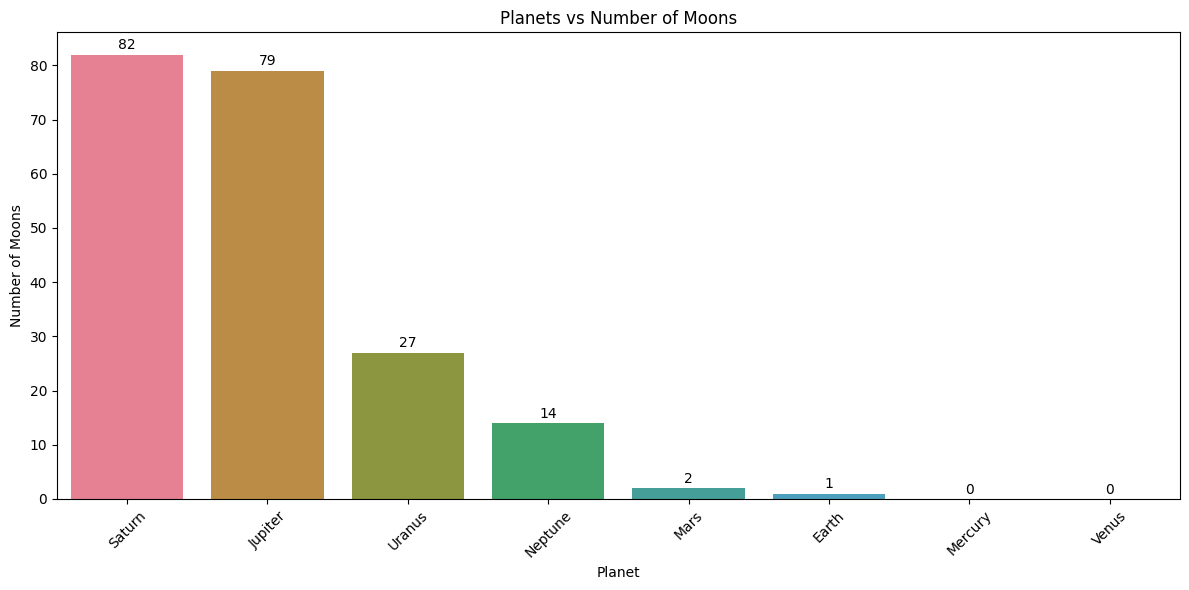

In [24]:
plt.figure(figsize=(12, 6))

# Sorting the dataframe by the number of moons
df_sorted = df.sort_values(by='Number of Moons', ascending=False)

# Creating the bar plot
sns.barplot(x='Planet', y='Number of Moons', data=df_sorted, palette='husl')

# Adding labels for each bar
for index, value in enumerate(df_sorted['Number of Moons']):
    plt.text(index, value + 1, f'{value}', ha='center')  # Adjusts the position of the labels

# Setting labels and title
plt.ylabel('Number of Moons')
plt.xlabel('Planet')
plt.title('Planets vs Number of Moons')

# Rotate x-tick labels for better readability
plt.xticks(rotation=45)

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()


**Observation:**

* "Saturn has the most moons of any planet in our solar system, with a total of 82 moons, followed closely by Jupiter, which has 79."

# SUMMARY

**"The planets in our solar system are a diverse collection of celestial bodies orbiting the Sun, divided into two main groups: the inner terrestrial planets (Mercury, Venus, Earth, and Mars) and the outer gas giants (Jupiter, Saturn, Uranus, and Neptune). The inner planets are rocky with solid surfaces, while the outer planets are primarily composed of gases and lack solid surfaces. Each planet has unique characteristics, including size, composition, atmosphere, and orbital properties. They also differ in terms of their moons, rings, magnetic fields, and surface features. Studying these planets offers valuable insights into planetary formation, evolution, and the potential for extraterrestrial life."**

**PLANETS**


sun:‚òÄÔ∏è
Mercury: üåë
Venus: üü°
Earth: üåç
Mars: üî¥
Jupiter: üü§
Saturn: ü™ê
Uranus: ü©µ
Neptune: üîµ
Pluto: ü§é

Stay tuned for more!
"I‚Äôd love to hear your feedback and suggestions to help me improve. üòá"